In [9]:
%load_ext autoreload
%autoreload 2

from simulation_loader import MongoLoader
from dotenv import find_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
sim:pd.DataFrame
mongo_loader = MongoLoader(path=find_dotenv())    

with mongo_loader as loader:
    sim = loader.retrieve_simulations()

# baseConfig, DEIB SERVER
filteredSims = MongoLoader.withTags(sim, ['DEIB SERVER', 'curve'])
MongoLoader.addAggregation(filteredSims, 'out.xtes')
MongoLoader.addFps(filteredSims)
filteredSims.head()

,in.map_size,in.initial_position,in.maxSpeed,in.minSpeed,in.maxTime,in.maxXTE,in.segLength,in.angles,out.elapsedTime,out.iterations,out.positions,out.speeds,out.xtes,out.steerings,out.throttles,out.road,tags,out.xtes.avg,fps
_id,,,,,,,,,,,,,,,,,,,
68ba01a17670de5f18fd8213,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 15, 0, 0]",9.950752,91,"[[125.5313, -0.0322, 1.7132], [125.5313, -0.03...","[0.0, 0.0, 0.0, 2.25936, 4.39164, 6.66216, 8.5...","[0.0, 0.0, 0.0, 0.0, -0.0006, -0.0017, -0.0034...","[-0.0012453822419047356, -0.025293167680501938...","[0.9999984502792358, 0.9993602633476257, 0.999...","[[125.0, 0.0, 1.9, 8.0], [125.13597706503646, ...","[DEIB SERVER, v0, curve]",0.132704,9.145038
68ba01b47670de5f18fd8215,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 15, 0, 0]",10.022773,93,"[[125.5313, -0.0322, 1.7132], [125.5313, -0.03...","[0.0, 0.0, 0.0, 2.20032, 4.40064, 6.3043200000...","[0.0, 0.0, 0.0, -0.0002, -0.0008, -0.0016, -0....","[-0.006122877821326256, -0.025320028886198997,...","[0.9999625086784363, 0.9993588924407959, 0.999...","[[125.0, 0.0, 1.9, 8.0], [125.13597706503646, ...","[DEIB SERVER, v0, curve]",0.113840,9.278869
68ba01c67670de5f18fd8217,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 15, 0, 0]",10.028365,89,"[[125.5313, -0.0322, 1.7132], [125.5313, -0.03...","[0.0, 0.0, 0.0, 2.21148, 4.033440000000001, 6....","[0.0, 0.0, 0.0, -0.0002, -0.0007, -0.002, -0.0...","[-0.026599105447530746, -0.025320028886198997,...","[0.9992924928665161, 0.9993588924407959, 0.999...","[[125.0, 0.0, 1.9, 8.0], [125.13597706503646, ...","[DEIB SERVER, v0, curve]",0.129597,8.874827
68ba01d97670de5f18fd8219,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 15, 0, 0]",9.937995,92,"[[125.5313, -0.0322, 1.7132], [125.5313, -0.03...","[0.0, 0.0, 0.0, 2.1722400000000004, 4.79988, 7...","[0.0, 0.0, 0.0, -0.0002, -0.0011, -0.0024, -0....","[-0.026483450084924698, -0.025608962401747704,...","[0.999298632144928, 0.9993441700935364, 0.9993...","[[125.0, 0.0, 1.9, 8.0], [125.13597706503646, ...","[DEIB SERVER, v0, curve]",0.096796,9.257400
68ba01ed7670de5f18fd821b,250,"[125.0, 0.0, -28.0, 8.0]",30,1,30,3.0,25,"[0, 15, 0, 0]",9.948807,92,"[[125.5313, -0.0322, 1.7132], [125.5313, -0.03...","[0.0, 0.0, 0.0, 2.2392, 4.46292, 6.36588, 8.60...","[0.0, 0.0, 0.0, -0.0002, -0.0008, -0.0017, -0....","[-0.01629304140806198, -0.026063449680805206, ...","[0.9997345209121704, 0.9993206858634949, 0.999...","[[125.0, 0.0, 1.9, 8.0], [125.13597706503646, ...","[DEIB SERVER, v0, curve]",0.133542,9.247340


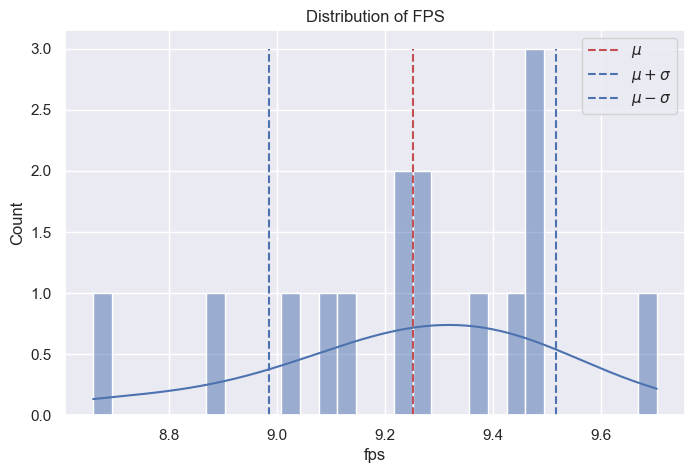

In [70]:
from simulation_analysis.Plotter import plotDistribution

plotDistribution(filteredSims['fps'], 'Distribution of FPS', 'fps', 'Count')

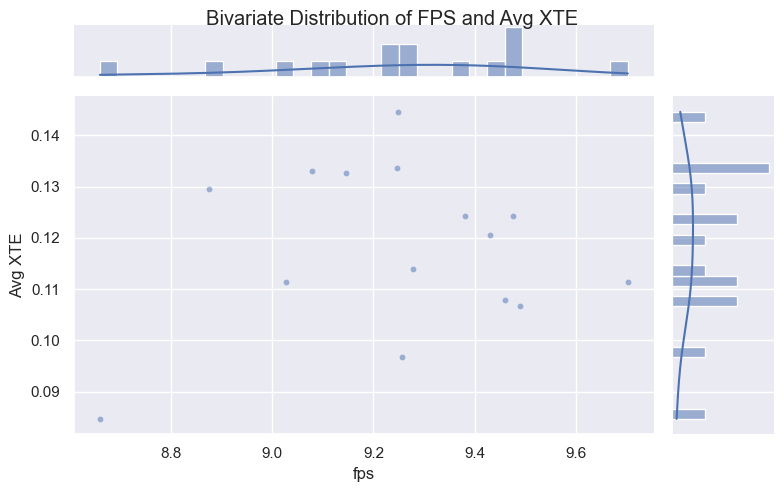

In [71]:
from simulation_analysis.Plotter import plotBivariateDistribution

plotBivariateDistribution(filteredSims['fps'], filteredSims['out.xtes.avg'], 'Bivariate Distribution of FPS and Avg XTE', 'fps', 'Avg XTE')

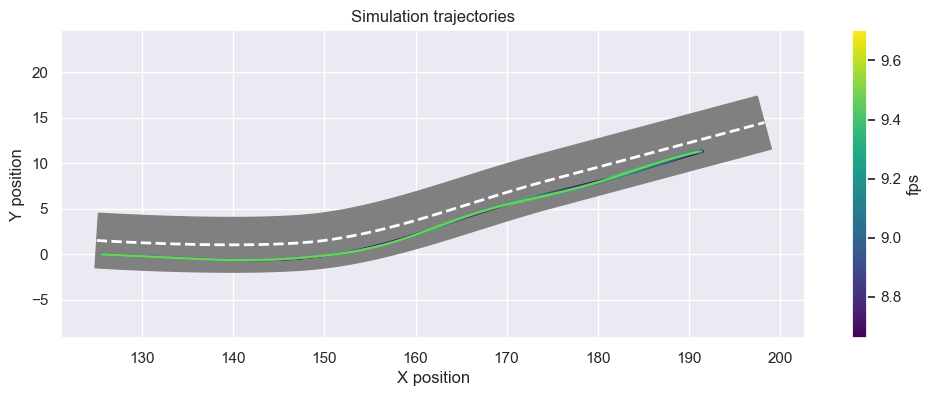

In [79]:
from simulation_analysis.Plotter import plotTrajectoriesOfARoad

plotTrajectoriesOfARoad(
    roadControlPoints=filteredSims.iloc[0]['out.road'],
    trajectories=filteredSims['out.positions'].tolist(),
    trajectoriesColor=filteredSims['fps'].tolist(),
    trajectoriesColorName='fps'
)
plt.show()

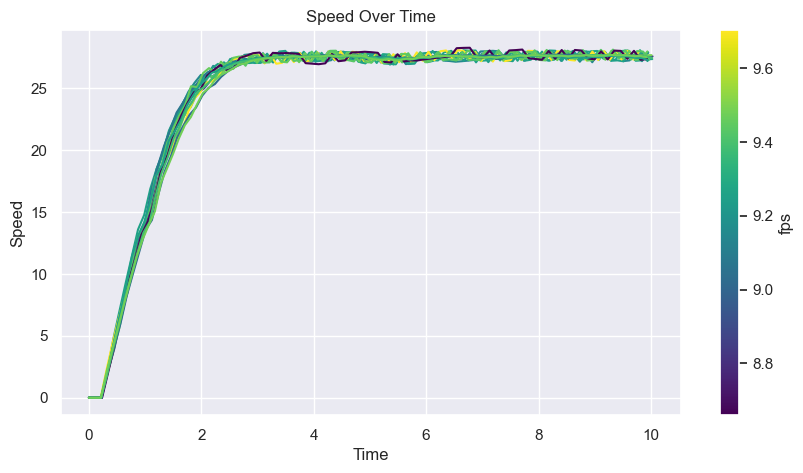

In [73]:
from simulation_analysis.Plotter import plotTimeSeries

plotTimeSeries(
    filteredSims['out.speeds'].tolist(),
    elapsedTimes=filteredSims['out.elapsedTime'].tolist(),
    title="Speed Over Time",
    ylabel="Speed",
    legend=False,
    color=filteredSims['fps'].tolist(),
    colorName='fps'
)

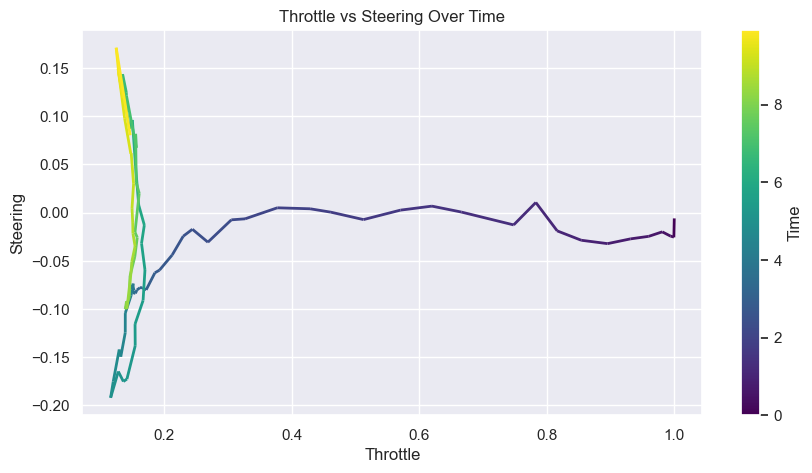

In [74]:
from simulation_analysis.Plotter import plotBivariateTimeSeries

index = -1
plotBivariateTimeSeries(
    xSeries=[filteredSims['out.throttles'].iloc[index]],
    ySeries=[filteredSims['out.steerings'].iloc[index]],
    elapsedTimes=[filteredSims['out.elapsedTime'].iloc[index]],
    title="Throttle vs Steering Over Time",
    xlabel="Throttle",
    ylabel="Steering",
    legend=False
)